# Data Exploration and cleaning
Load the dataframe in and explore the data

Goal: Create a forecasting of covid cases using ARIMA, LSTM and Facebook Prophet

In [14]:
#import modules
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
covid = pd.read_csv('covid.csv')

In [4]:
covid.head()

,Country,Date,Confirmed,Recovered,Deaths,Active Cases,Death Rate(%),Increase,FirstDays,day_xth,Population_1k,TenCase,Cases/1000s
0,Afghanistan,2020-01-22,0,0,0,0,0.0,0.0,2020-02-24,0,38928,2020-03-11,0.0
1,Afghanistan,2020-01-23,0,0,0,0,0.0,0.0,2020-02-24,0,38928,2020-03-11,0.0
2,Afghanistan,2020-01-24,0,0,0,0,0.0,0.0,2020-02-24,0,38928,2020-03-11,0.0
3,Afghanistan,2020-01-25,0,0,0,0,0.0,0.0,2020-02-24,0,38928,2020-03-11,0.0
4,Afghanistan,2020-01-26,0,0,0,0,0.0,0.0,2020-02-24,0,38928,2020-03-11,0.0


In [8]:
# how many countries
print(covid['Country'].nunique())
country_list = list(covid['Country'].unique())

195


In [9]:
# Name of countries. There is literally a country named Summer Olympics 2020?? 
country_list

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [12]:
# lets find the date range for the data, FirstDays is when the first covid case is reported. 
print(covid['Date'].min())
print(covid['Date'].max())
# So about 2 years of data, it goes to present day, and is updated daily. 

2020-01-22
2022-02-05


In [10]:
covid.head()

,Country,Date,Confirmed,Recovered,Deaths,Active Cases,Death Rate(%),Increase,FirstDays,day_xth,Population_1k,TenCase,Cases/1000s
0,Afghanistan,2020-01-22,0,0,0,0,0.0,0.0,2020-02-24,0,38928,2020-03-11,0.0
1,Afghanistan,2020-01-23,0,0,0,0,0.0,0.0,2020-02-24,0,38928,2020-03-11,0.0
2,Afghanistan,2020-01-24,0,0,0,0,0.0,0.0,2020-02-24,0,38928,2020-03-11,0.0
3,Afghanistan,2020-01-25,0,0,0,0,0.0,0.0,2020-02-24,0,38928,2020-03-11,0.0
4,Afghanistan,2020-01-26,0,0,0,0,0.0,0.0,2020-02-24,0,38928,2020-03-11,0.0


In [18]:
# Lets just try plotting for a single country the death rates
Canada = pd.DataFrame(covid[covid['Country'] == 'Canada'])

In [31]:
Canada[['Date','Confirmed']]

,Date,Confirmed
23872,2020-01-22,0
23873,2020-01-23,0
23874,2020-01-24,0
23875,2020-01-25,0
23876,2020-01-26,1
...,...,...
24613,2022-02-01,3066278
24614,2022-02-02,3081616
24615,2022-02-03,3095641
24616,2022-02-04,3109754


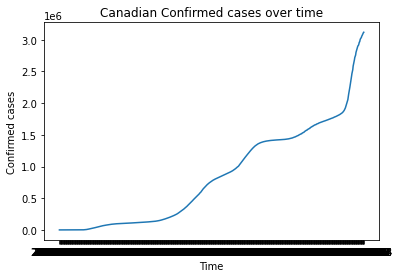

In [29]:
# plot the confirmed over time.

plt.plot(Canada['Date'],
        Canada['Confirmed'])
plt.title('Canadian Confirmed cases over time')
plt.xlabel('Time')
plt.ylabel('Confirmed cases')
plt.show()